In [65]:
from sklearn.pipeline import Pipeline
import time

In [66]:
#Importing Libraries

start = time.time()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.width', 1000)
pd.set_option('display.max_column', None)
np.set_printoptions(precision = 3)

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))


Runtime: 0.000 seconds


# Loading Dataset

In [67]:
#Load the dataset and do some quick exploratory analysis
data = pd.read_csv('SBAnational.csv')
print(data.shape,"\n")
print(data.describe(include = "all"),"\n")
print(data.info(),"\n")
data.sample(5)

(899164, 27) 

        LoanNr_ChkDgt    Name         City   State            Zip                        Bank BankState          NAICS ApprovalDate  ApprovalFY           Term          NoEmp       NewExist      CreateJob    RetainedJob  FranchiseCode     UrbanRural RevLineCr  LowDoc ChgOffDate DisbursementDate DisbursementGross BalanceGross MIS_Status ChgOffPrinGr       GrAppv     SBA_Appv
count    8.991640e+05  899150       899134  899150  899164.000000                      897605    897598  899164.000000       899164    899164.0  899164.000000  899164.000000  899028.000000  899164.000000  899164.000000  899164.000000  899164.000000    894636  896582     162699           896796            899164       899164     897167       899164       899164       899164
unique            NaN  779583        32581      51            NaN                        5802        56            NaN         9859        70.0            NaN            NaN            NaN            NaN            NaN            NaN

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
686709,7107434008,HAIRWORLD,NASHVILLE,TN,37210,U.S. BANK NATIONAL ASSOCIATION,OH,446120,20-Jan-04,2004,4,4,1.0,0,4,1,1,Y,N,8-Dec-10,31-Mar-04,"$89,854.00",$0.00,CHGOFF,"$23,309.00","$25,000.00","$12,500.00"
392826,3786143000,TCBY OF MEDFORD,MEDFORD,OR,97501,WELLS FARGO BANK NATL ASSOC,SD,0,25-Jan-90,1990,84,10,1.0,0,0,81630,0,N,N,NaN,30-Apr-90,"$107,000.00",$0.00,P I F,$0.00,"$107,000.00","$96,300.00"
607152,6028193009,"SUEANN INC., DBA SAMMIE'S",LAS VEGAS,NV,89103,WELLS FARGO BANK NATL ASSOC,NV,0,29-Oct-93,1994,126,16,2.0,0,0,1,0,N,N,NaN,31-Jan-94,"$115,413.00",$0.00,P I F,$0.00,"$115,413.00","$98,101.00"
476937,4593185002,"V.R.T. PROVISIONS, INC.",HIALEAH,FL,33013,COMMUNITY BANK OF BROWARD,FL,424410,21-Mar-11,2011,39,7,1.0,1,7,0,1,N,N,13-Mar-14,21-Mar-11,"$200,000.00",$0.00,CHGOFF,"$146,846.00","$200,000.00","$150,000.00"
675045,6917814001,"WAYNE SHELTON&ASSOCIATES, PSC",PADUCAH,KY,42001,PADUCAH BK & TR CO,KY,541211,14-Nov-03,2004,60,5,1.0,0,0,1,2,N,N,NaN,30-Nov-03,"$163,000.00",$0.00,P I F,$0.00,"$163,000.00","$122,250.00"


# Data Visualisation

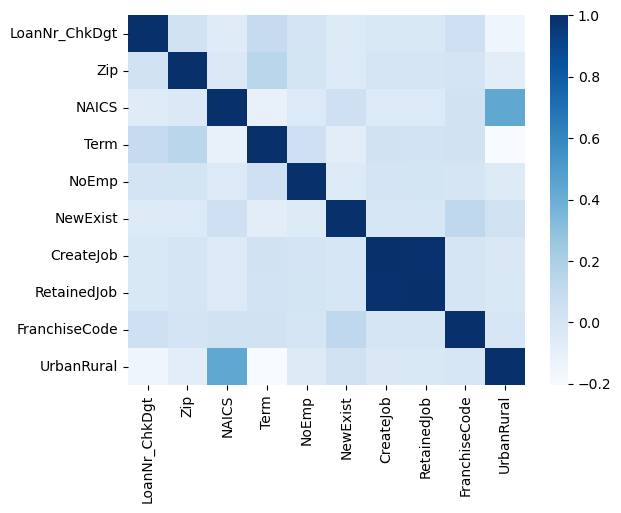

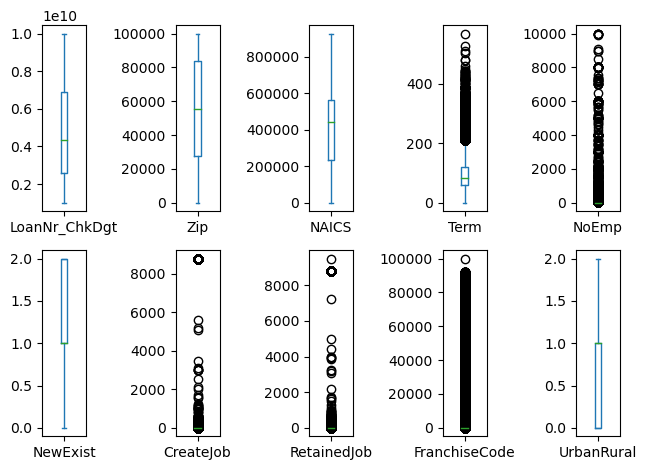


Runtime: 2.088 seconds


In [68]:
start = time.time()

# Pearson correlation
sns.heatmap(data.corr(),annot=False,cmap='Blues')

# Box and Whisker plot
data.plot(kind = "box", subplots = True, layout=(2,5), sharex = False, sharey = False)

plt.tight_layout()
plt.show()

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

# Data Preprocessing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               886240 non-null  object 
 1   City               886240 non-null  object 
 2   State              886240 non-null  object 
 3   Zip                886240 non-null  int64  
 4   Bank               886240 non-null  object 
 5   BankState          886240 non-null  object 
 6   NAICS              886240 non-null  int64  
 7   ApprovalDate       886240 non-null  object 
 8   ApprovalFY         886240 non-null  object 
 9   Term               886240 non-null  int64  
 10  NoEmp              886240 non-null  int64  
 11  NewExist           886240 non-null  float64
 12  CreateJob          886240 non-null  int64  
 13  RetainedJob        886240 non-null  int64  
 14  FranchiseCode      886240 non-null  int64  
 15  UrbanRural         886240 non-null  in

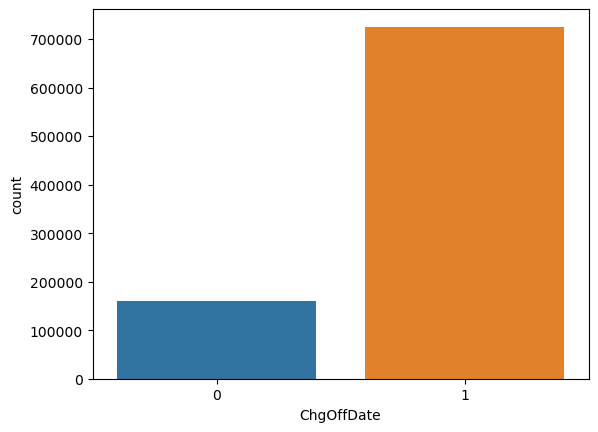

In [69]:
start = time.time()

# data cleaning

start = time.time()
data["ChgOffDate"] = data["ChgOffDate"].fillna(1)
data["ChgOffDate"] = data["ChgOffDate"].apply(lambda x : 1 if(x == 1) else 0)
data = data.dropna(how = "any", axis = 0)
data = data.set_index("LoanNr_ChkDgt")
data.info()
print(data.head(5),"\n")
print(sns.countplot(x=data["ChgOffDate"]))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

In [70]:
start = time.time()

#Feature Engineering

L = []

for x in np.array(data.NAICS):
    x = int(str(x)[0:2])
    if(x == 11): x = "Agriculture, forestry, fishing and hunting"
    elif(x == 21): x = "Mining, quarrying, and oil and gas extraction"
    elif(x == 22): x = "Utilities"
    elif(x == 23): x = "Construction"
    elif(x == 31 or x == 32 or x == 33): x = "Manufacturing"
    elif(x == 42): x = "Wholesale trade"
    elif(x == 44 or x == 45): x = "Retail trade"
    elif(x == 48 or x == 49): x = "Transportation and warehousing"
    elif(x == 51): x = "Information"
    elif(x == 52): x = "Finance and insurance"
    elif(x == 53): x = "Real estate and rental and leasing"
    elif(x == 54): x = "Professional, scientific, and technical services"
    elif(x == 55): x = "Management of companies and enterprises"
    elif(x == 56): x = "Administrative and support and waste management and remediation services"
    elif(x == 61): x = "Educational services"
    elif(x == 62): x = "Health care and social assistance"
    elif(x == 71): x = "Arts, entertainment, and recreation"
    elif(x == 72): x = "Accommodation and food services"
    elif(x == 92): x = "Public administration"
    else: x = "Other services (except public administration)"
    L.append(x)
    
data.insert(4,"Sector(based on NAICS)",L)
del(data['NAICS'])

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))


Runtime: 0.790 seconds


In [71]:
start = time.time()

#Integer Encoding

label_encoder = LabelEncoder()
colHeads = data.columns
L = []
for head in colHeads:
    if("ApprovalFY" == head):
        continue
    elif(data[head].dtypes == 'object'): 
        data[head] = label_encoder.fit_transform(data[head])
        
for x in np.array(data.ApprovalFY):
    x = int(str(x)[0:4])
    L.append(x)
    
data.insert(4,"Approval_FY",L)
del(data['ApprovalFY'])

print(data.head(5))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

                 Name   City  State    Zip  Approval_FY  Sector(based on NAICS)  Bank  BankState  ApprovalDate  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  BalanceGross  MIS_Status  ChgOffPrinGr  GrAppv  SBA_Appv
LoanNr_ChkDgt                                                                                                                                                                                                                                                                                                         
1000014003      12650   8483     15  47711         1997                      16  2140         38          6538    84      4       2.0          0            0              1           0         12       7           1              5640              89596             0           1             0   16418     24632
1000024006     400509  19412     15  46526         1997            

In [72]:
start = time.time()

#Segregating input and output

X = data.drop("ChgOffDate", axis = 1).values
Y = data["ChgOffDate"].values
print(data.info())

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Name                    886240 non-null  int32  
 1   City                    886240 non-null  int32  
 2   State                   886240 non-null  int32  
 3   Zip                     886240 non-null  int64  
 4   Approval_FY             886240 non-null  int64  
 5   Sector(based on NAICS)  886240 non-null  int32  
 6   Bank                    886240 non-null  int32  
 7   BankState               886240 non-null  int32  
 8   ApprovalDate            886240 non-null  int32  
 9   Term                    886240 non-null  int64  
 10  NoEmp                   886240 non-null  int64  
 11  NewExist                886240 non-null  float64
 12  CreateJob               886240 non-null  int64  
 13  RetainedJob             886240 non-null  int64  
 14  Franchi

In [73]:
start = time.time()

#Feature Selection

test = SelectKBest(score_func = chi2, k = 16)
fit = test.fit(X,Y)
print(fit.scores_)
X_selected = fit.transform(X)

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

[2.542e+05 3.174e+05 9.482e+03 3.938e+05 6.647e+02 4.411e+02 9.096e+06
 1.116e+03 3.324e+04 5.228e+06 3.041e+05 6.346e+01 7.966e+05 6.734e+05
 1.501e+07 1.236e+04 1.405e+04 1.324e+03 5.157e+06 5.779e+03 2.329e+01
 1.502e+05 2.953e+10 1.290e+06 1.650e+07]

Runtime: 0.213 seconds


In [74]:
start = time.time()

#Standardization of input data

scaler = StandardScaler()

scaler = scaler.fit(X_selected)
X_selected_transformed = scaler.transform(X_selected)

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))


Runtime: 0.147 seconds


In [75]:
start = time.time()

#Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X_selected_transformed,Y,test_size = 0.25, random_state = 7)
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("Y_train: ", len(Y_train))
print("Y_test: ", len(Y_test))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

X_train:  664680
X_test:  221560
Y_train:  664680
Y_test:  221560

Runtime: 0.183 seconds


# Spot Checking

In [76]:
kfold = KFold(n_splits = 10)

In [77]:
start = time.time()

#Logistic Regression

model = LogisticRegression()
results = cross_val_score(model,X_train,Y_train, cv = kfold)
print("Validation Score for Logistic Regression: %.3f%%"% (results.mean()*100))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Validation Score for Logistic Regression: 99.933%

Runtime: 16.249 seconds


In [78]:
start = time.time()

#Linear Discriminant Analysis

model = LinearDiscriminantAnalysis()
results = cross_val_score(model,X_train,Y_train, cv = kfold)
print("Validation Score for Linear Discriminant Analysis: %.3f%%"% (results.mean()*100))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Validation Score for Linear Discriminant Analysis: 99.443%

Runtime: 9.603 seconds


In [79]:
start = time.time()

#Gaussian (Naive Bayes)

model = GaussianNB()
results = cross_val_score(model,X_train,Y_train, cv = kfold)
print("Validation Score for GaussianNB: %.3f%%"% (results.mean()*100))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Validation Score for GaussianNB: 99.943%

Runtime: 2.081 seconds


In [80]:
start = time.time()

#KNN Classifier

model = GaussianNB()
model = model.fit(X_train, Y_train)   
Y_predicted = model.predict(X_test)
print("Validation Score for KNN Classifier: %.3f%%"% (accuracy_score(Y_test, Y_predicted)*100))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Validation Score for KNN Classifier: 99.938%

Runtime: 0.241 seconds


In [81]:
start = time.time()

#CART (Classification And Regression Tree)

model = DecisionTreeClassifier()
model = model.fit(X_train, Y_train)   
Y_predicted = model.predict(X_test)
print("Validation Score for CART: %.3f%%"% (accuracy_score(Y_test, Y_predicted)*100))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Validation Score for CART: 99.981%

Runtime: 5.222 seconds


In [ ]:
start = time.time()

#Random Forest Algorithm

model = RandomForestClassifier(random_state = 0)
results = cross_val_score(model,X_train,Y_train, cv = kfold)
print("Validation Score for Random Forest Classifier: %.3f%%"% (results.mean()*100))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Runtime: infinity

In [ ]:
start = time.time()

#SVM (Support Vector Machine)

model = SVC()
model = model.fit(X_train, Y_train)   
Y_predicted = model.predict(X_test)
print("Validation Score for SVC: %.3f%%"% (accuracy_score(Y_test, Y_predicted)*100))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Runtime: infinity

# Training the Model

In [82]:
start = time.time()

#Training the best model

model = DecisionTreeClassifier()
model = model.fit(X_train, Y_train)   #Training of best algorithm
Y_predicted = model.predict(X_test)

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))


Runtime: 4.615 seconds


# Evaluation Metrics

In [83]:
start = time.time()

#Classification Accuracy
print("\n\nAccuracy score of Decision Tree Classifier %f%%" % (accuracy_score(Y_test, Y_predicted)*100))
print("\n")

#Confusion Matrix
print("confusion_matrix = \n")
print( confusion_matrix(Y_test, Y_predicted))
print("\n")

#Classification Report
print("classification_report = \n")
print( classification_report(Y_test, Y_predicted))

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))



Accuracy score of Decision Tree Classifier 99.980141%


confusion_matrix = 

[[ 40152     21]
 [    23 181364]]


classification_report = 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40173
           1       1.00      1.00      1.00    181387

    accuracy                           1.00    221560
   macro avg       1.00      1.00      1.00    221560
weighted avg       1.00      1.00      1.00    221560


Runtime: 0.286 seconds


# Dumping Trained Model

In [84]:
start = time.time()

import joblib
filename =  "finalized_SBAnational_model.sav"
joblib.dump(model, filename)
print( "Best Performing Model dumped successfully into a file by Joblib")

end = time.time()

print("\nRuntime: %.3f seconds"% (end - start))

Best Performing Model dumped successfully into a file by Joblib

Runtime: 0.000 seconds
